In [1]:
from Architectures.AE import AE
from Data.load import load
from matplotlib import pyplot as plt
import numpy as np

In [23]:
train, test = load("Pre-processed", take=100)

Loading images: 100%|██████████| 100/100 [00:42<00:00,  2.34it/s]


In [45]:
ae = AE((100,80,96,80),halvings=3, latent_dim=1000, output_activation="tanh")

Interpreted image shape: (80, 96, 80, 1)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 1000)           │    12,006,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    12,020,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,027,101 (91.66 MB)

 Trainable params: 24,027,101 (91.66 MB)

 Non-trainable params: 0 (0.00 B)

-0.5088650429552424 0.8838309151430344


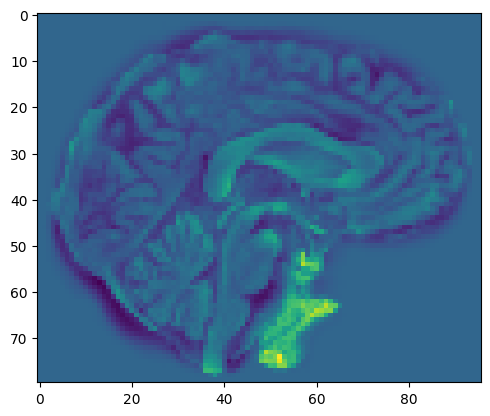

In [43]:
# Train on the diff to the mean brain instead
mean_brain = np.mean(train, axis=0)
diff_train = train - mean_brain
diff_test = test - mean_brain
plt.imshow(np.rot90(diff_train[0][40]))
print(np.min(diff_train), np.max(diff_train))

In [46]:
ae.train(diff_train,epochs=30)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 833ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 559ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 551ms/step - loss: 0.0053 - val_loss: 0.0056
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 530ms/step - loss: 0.0048 - val_loss: 0.0055
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - loss: 0.0043 - val_loss: 0.0056
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 545ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 561ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - loss: 0.0039 - val_lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


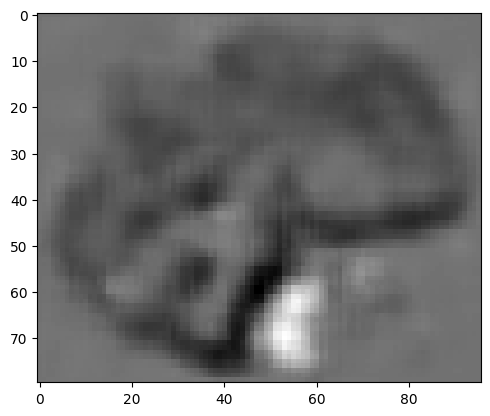

In [52]:
latent = ae.encode(diff_test)
recon = ae.decode(latent)
plt.imshow(np.rot90(recon[1][40]),cmap="gray")

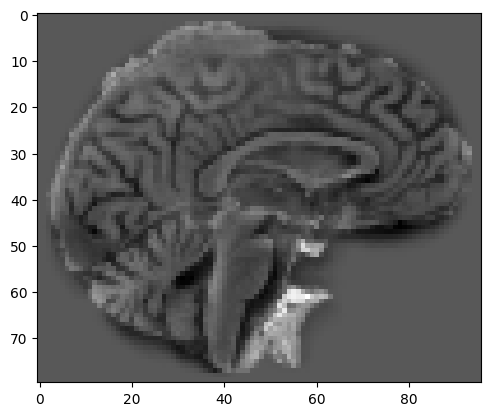

In [51]:
plt.imshow(np.rot90(diff_test[1][40]),cmap="gray")